파이썬 모듈/함수 공부하는 방법


1. np.doc   (online 일 때)
2. dir(np) :  numpy의 doc 보여줌.
3. help(np.mean)  :  offline일 때  numpy doc 내용 보여줌,

Numpy의 장점


1. 선형대수 설명
2. 속도가 빠르다
3. randomize 가능

## 1. 중심경향치와 산포도

### Q1) numpy 기술통계와 소수점 표현
- 내장함수 help()와 dir()를 이용하거나 docs를 이용해서 다음 기술통계를 소수점 셋째자리까지 작성하기.
- 소수점자리는 f-string 문법을 이용해 표기하기 (참고:[f-string](https://blockdmask.tistory.com/429))  
- 평균(_mean), 중앙값(_median), 분산(_var), 표준편차(_std) (참고 [numpy docs - mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [ ]:
import numpy as np
data = [10, 20, 20, 30, 40]

In [ ]:
help(np.mean)

Help on _ArrayFunctionDispatcher in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computin

In [ ]:
print(f'평균은 {np.mean(data):.3f}입니다')

평균은 24.000입니다


In [ ]:
print(f'중앙값은 {np.median(data):.3f}입니다.')

중앙값은 20.000입니다.


In [ ]:
print(f'분산은 {np.var(data):.3f}입니다.')

분산은 104.000입니다.


In [ ]:
print(f'표준편차는 {np.std(data):.3f}입니다.')

표준편차는 10.198입니다.


In [ ]:
print(f'평균은 {np.mean(data):.3f}입니다.')
print(f'중앙값은 {np.median(data):.3f}입니다.')
print(f'분산은 {np.var(data):.3f}입니다.')
print(f'표준편차는 {np.std(data):.3f}입니다.')

평균은 24.000입니다.
중앙값은 20.000입니다.
분산은 104.000입니다.
표준편차는 10.198입니다.


### Q2) 커플통장: 산술평균과 조화평균
- 커플통장의 예시를 가지고 산술평균과 조화평균의 지표로서의 차이를 비교

In [ ]:
#기술통계 계산용 numpy와  그래프작성용 matplotlib.pyplot 가져옴. (male rate=2로 fix.  female rate은 0에서 100까지500개의 무작위 값으로 구성해서 선으로 그려짐)
#linspace  특정 범위 내에서 균등하게 분포된 숫자 배열을 생성
import matplotlib.pyplot as plt
import numpy as np

male_rate = 2
female_rate = np.linspace(0, 100, 500)

In [ ]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly s

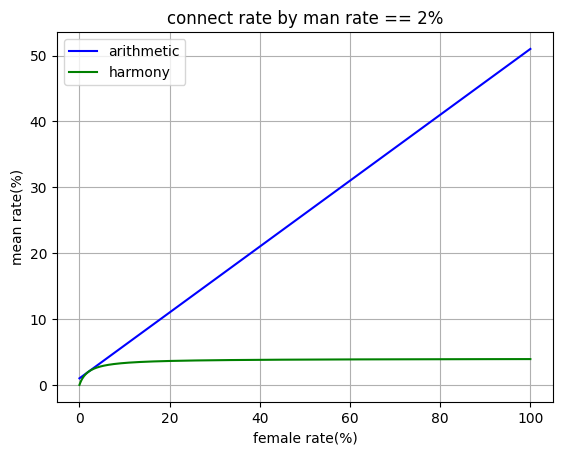

In [ ]:
# @커플 통장 예시로 코드 작성

#Step 1 : Data 만들기
arithmetic_mean_fixed = (male_rate+female_rate) / 2
harmonic_mean_fixed = 2*male_rate*female_rate/(male_rate+female_rate)
harmonic_mean_fixed = np.nan_to_num(harmonic_mean_fixed)  # Convert NaNs to 0 for division by zero (선생님추가한 내용?)

#Step 2 :  그래프 그리기
plt.plot(female_rate, arithmetic_mean_fixed, label="arithmetic", color="blue")
plt.plot(female_rate, harmonic_mean_fixed, label="harmony", color="green")

#Step 3 :  추가기능
plt.xlabel("female rate(%)")
plt.ylabel("mean rate(%)")
plt.title("connect rate by man rate == 2%")
plt.legend()
plt.grid(True)
plt.show()

### Q3) 산포도: 표준편차와 변동계수

- 두 회사의 6일간 주가데이터가 수집하였습니다. Numpy와 Pandas를 각각 변동계수를 구해봅시다.
- 변동계수: 표준편차 / 평균 * 100

- 변동 계수가 클 때의 의미:

   : 데이터의 변동이 큼 → 평균값에 비해 값들이 흩어져 있음.

   : 일관성이 낮음 → 데이터의 안정성이 부족할 수 있음.

   : 비교가 용이함 → 서로 다른 데이터셋의 변동성을 비교할 때 유용.

In [ ]:
# Numpy 방법

import numpy as np
com_a = [76300, 77400, 77900, 77200, 76900, 78800]
com_b = [6400, 7000, 7400, 6900, 7300, 7600]

mean_a_np = np.mean(com_a)
std_a_np = np.std(com_a, ddof=1)
cv_a_np = std_a_np / mean_a_np

mean_b_np = np.mean(com_b)
std_b_np = np.std(com_b, ddof=1)
cv_b_np = std_b_np / mean_b_np

print(f'A회사의 변동계수 {cv_a_np:.3f}') # 주가 변동계수가 낮으므로, B에 비해 안정적이라 할 수 있음
print(f'B회사의 변동계수 {cv_b_np:.3f}') # 주가 변동계수가 높으므로, A에 비해 변동폭이 크므로, 리스크가 있음.

A회사의 변동계수 0.011
B회사의 변동계수 0.060


In [ ]:
# Pandas 방법

import pandas as pd
data = pd.DataFrame({'Company A': com_a, 'Company B': com_b})

mean_a_pd = data['Company A'].mean()
std_a_pd = data['Company A'].std()
cv_a_pd = std_a_pd / mean_a_pd

mean_b_pd = data['Company B'].mean()
std_b_pd = data['Company B'].std()
cv_b_pd = std_b_pd / mean_b_pd

print(f'A회사의 변동계수 {cv_a_pd:.3f}')
print(f'B회사의 변동계수 {cv_b_pd:.3f}')

A회사의 변동계수 0.011
B회사의 변동계수 0.060


### Q4) 산포도: boxplot
- 최대-최소 범위, 사분위수(IQR Inter Quntail Range)을 구하고 boxplot시각화를 해봅시다.

In [ ]:
data = [10, 12, 23, 23, 16, 23, 21, 16, 7, 9]

최대최소범위 16.000
iqr 12.000


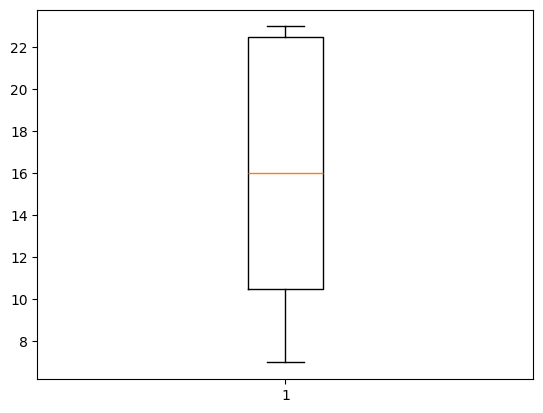

In [ ]:
#코드 작성
data_range = np.max(data) - np.min(data)
iqr = np.percentile(data,75) - np.percentile(data,25)

print(f'최대최소범위 {data_range:.3f}')
print(f'iqr {iqr:.3f}')

import matplotlib.pyplot as plt
plt.boxplot(data)
plt.show()

## 2. 데이터 시각화
- tips 데이터를 이용한 데이터 시각화

### Q5) 통계분석 실습 문제

1. total_bill의 기본 통계량(평균, 중앙값, 분산, 표준편차)을 계산하시오.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
tips = sns.load_dataset('tips')
display(tips.head(3))
display(tips.describe(include = 'all'))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
#코드
print(f'평균은 {np.mean(tips["total_bill"]):.3f}입니다.')
print(f'중앙값은 {np.median(tips["total_bill"]):.3f}입니다.')
print(f'분산은 {np.var(tips["total_bill"]):.3f}입니다.')
print(f'표준편차는 {np.std(tips["total_bill"]):.3f}입니다.')

#코드
mean = tips['total_bill'].mean()
median = tips['total_bill'].median()
variance = tips['total_bill'].var()
std_dev = tips['total_bill'].std()
print(f"Mean: {mean:.3f}, Median: {median:.3f}, Variance: {variance:.3f}, Std Dev: {std_dev:.3f}")

평균은 19.786입니다.
중앙값은 17.795입니다.
분산은 78.928입니다.
표준편차는 8.884입니다.
Mean: 19.786, Median: 17.795, Variance: 79.253, Std Dev: 8.902


2. 요일별 팁의 평균 비교
문제: 요일(day)별 팁(tip)의 평균을 계산하고, 가장 팁이 많이 주어진 요일을 구하시오.

In [ ]:
#코드
tip_byDay=tips.groupby('day', observed=False)['tip'].mean()
print(tip_byDay)
print(f'가장 팁이 많이 주어진 요일은 {tip_byDay.idxmax()} 입니다.')

#코드
tips.groupby("day", observed=False)["tip"].mean().round(3)

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64
가장 팁이 많이 주어진 요일은 Sun 입니다.


,tip
day,
Thur,2.771
Fri,2.735
Sat,2.993
Sun,3.255


3. 흡연자와 비흡연자(smoker)의 total_bill 평균과 표준편차를 비교하시오.

In [ ]:
#코드
tip_bySmoker = tips.groupby('smoker', observed=False)['total_bill'].agg(['mean', 'std'])
print(tip_bySmoker)

#코드
tips.groupby("smoker", observed=False)["total_bill"].agg(["mean", "std"])

             mean       std
smoker                     
Yes     20.756344  9.832154
No      19.188278  8.255582


,mean,std
smoker,,
Yes,20.756344,9.832154
No,19.188278,8.255582


4. 성별(sex)과 흡연 여부(smoker)에 따라 평균 팁이 어떻게 달라지는지 확인하시오.

In [ ]:
#코드
tips.groupby(["sex", "smoker"], observed=False)["tip"].mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

5. 요일별 총 total_bill의 합계를 계산하고, 어떤 요일에 가장 많은 매출이 발생했는지 확인하시오.

In [ ]:
#코드
tips.groupby("day", observed=False)["total_bill"].sum()

,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


### Q6) 시각화

<Axes: xlabel='day', ylabel='count'>

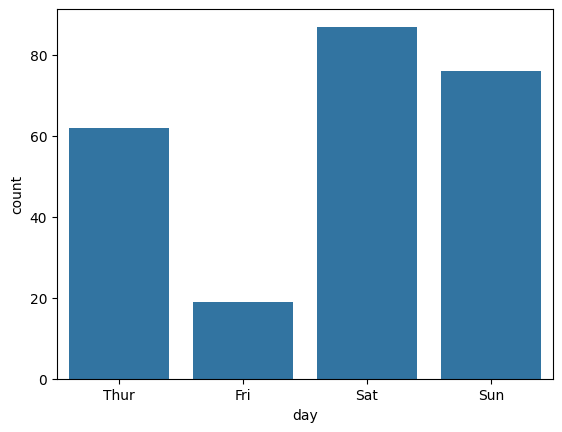

In [ ]:
# countplot: x축 범주형, y축 관측치 코드
sns.countplot(data = tips, x = 'day')

<Axes: xlabel='sex', ylabel='tip'>

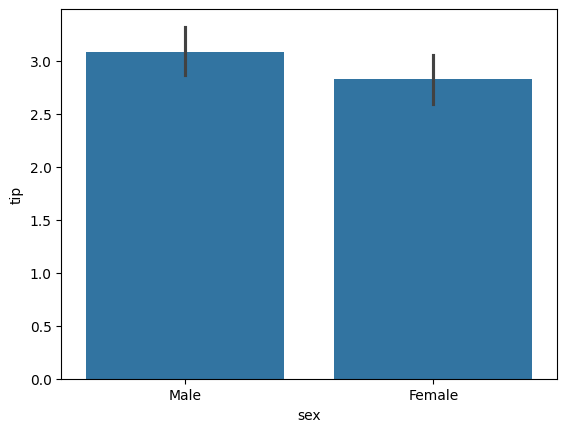

In [ ]:
# barplot: X축이 범주형, Y축이 연속형 값
sns.barplot(data = tips, x = 'sex', y = 'tip', estimator = 'mean')

<Axes: xlabel='time', ylabel='total_bill'>

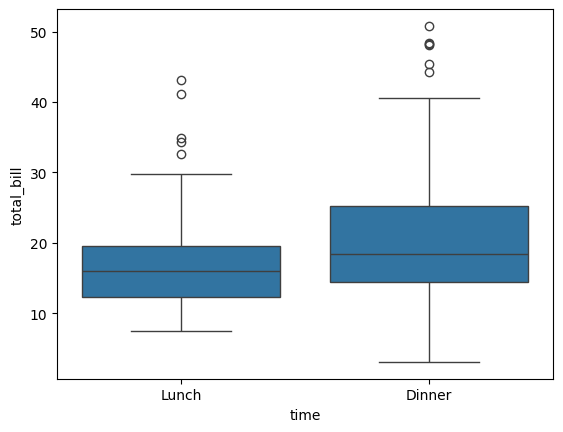

In [ ]:
#boxplot: X축이 범주형, Y축이 수치형
sns.boxplot(data = tips, x = 'time',y = 'total_bill')

<Axes: xlabel='total_bill', ylabel='Count'>

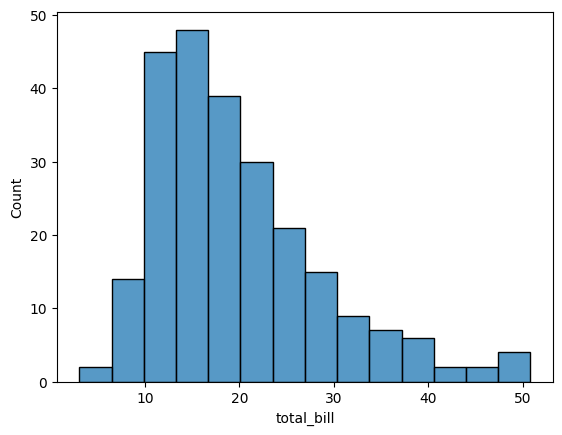

In [ ]:
#histplot: X축 수치형, Y축 자료의 빈도수
sns.histplot(data = tips, x = 'total_bill')

<Axes: xlabel='total_bill', ylabel='tip'>

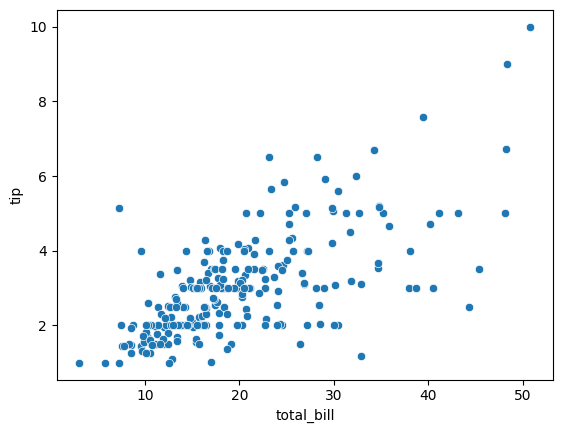

In [ ]:
#scatterplot X축 수치형, Y축 수치형
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')

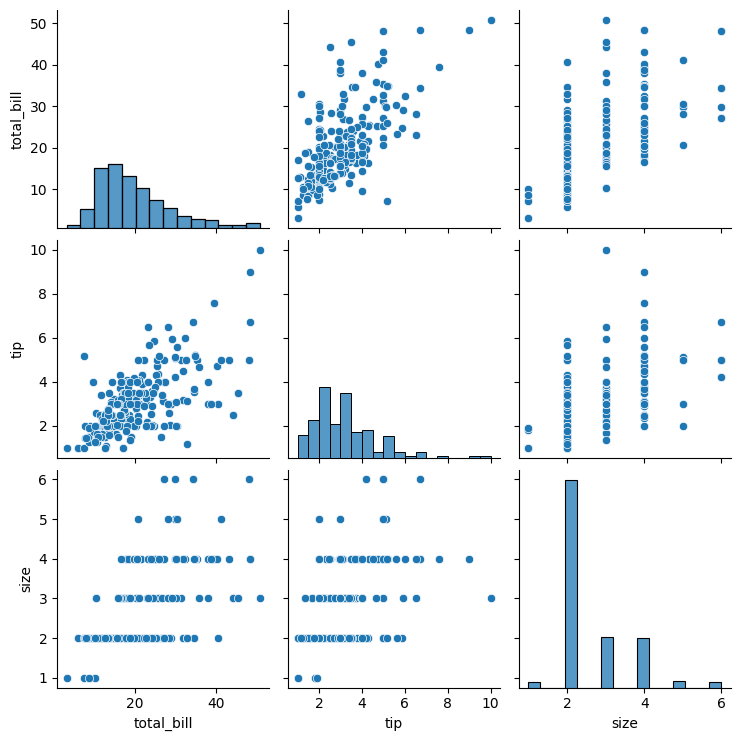

In [ ]:
#pairplot: X,Y축 모두 수치형
sns.pairplot(data = tips)

## Numpy.random
- 다음은 Numpy.random모듈을 학습하기위한 문제입니다.
- 출력 결과를 재현하기 위한 코드를 작성해보세요
- Numpy docs 혹은 블로그를 참고하기 바라며 LLM 서비스는 자제해주세요

### Q7) 균등분포에서 난수 생성
- 0과 1사이의 실수 난수 100개를 생성하고 평균과 표준편차를 소수점 3번째짜리 까지 계산

In [55]:
# 난수 생성, 평균과 표준편차 계산
# 난수 생성
data = np.random.rand(100)
# 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")


Mean: 0.493
Standard Deviation: 0.310


### Q8) 주사위 시뮬레이션
- 주사위를 100번 던졌을때 나올 숫자를 시뮬레이션하고 각 숫자가 나온 횟수를 계산

Dice roll counts: {1: 18, 2: 14, 3: 17, 4: 16, 5: 13, 6: 22}


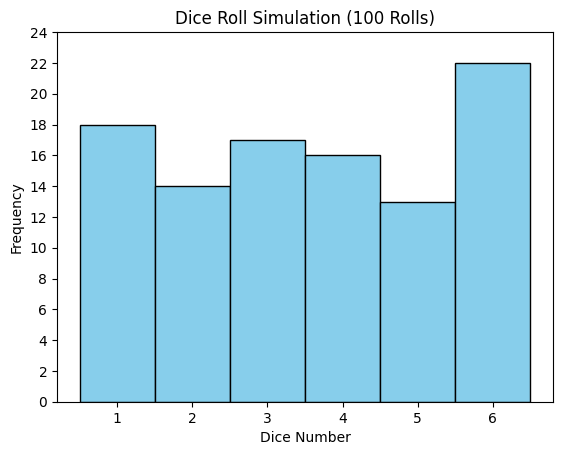

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 주사위 던지기 시뮬레이션
rolls = []
for _ in range(100):  # 주사위를 100번 던짐
    roll = np.random.randint(1, 7)  # 1부터 6까지의 정수 중 하나를 무작위로 선택
    rolls.append(roll)

# 2. 각 숫자의 빈도 계산
roll_counts = {}
for number in range(1, 7):  # 주사위는 1부터 6까지의 숫자를 가짐
    roll_counts[number] = rolls.count(number)  # 각 숫자가 rolls에 몇 번 등장했는지 계산

# 3. 결과 출력
print("Dice roll counts:", roll_counts)

# 4. 히스토그램 그리기
plt.hist(rolls, bins=np.arange(1, 8) - 0.5, color='skyblue', edgecolor='black')
plt.title("Dice Roll Simulation (100 Rolls)")
plt.xlabel("Dice Number")
plt.ylabel("Frequency")
plt.yticks(range(0, 26,2))
plt.xticks(range(1, 7))  # X축에 1부터 6까지 숫자를 표시
plt.show()


### Q9) 정규분포 데이터 생성

- 평균 50, 표준편차 10인 정규분포에서 1,000개의 데이터를 생성하고 히스토그램 그리기

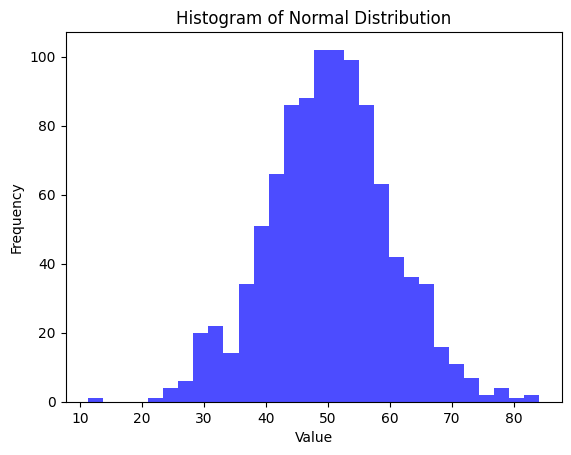

In [60]:
import matplotlib.pyplot as plt

# 정규분포 데이터 생성
data = np.random.normal(loc=50, scale=10, size=1000)

# 히스토그램 그리기
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Q10) 로또 생성기 만들기

#### Part1: 단 1번의 추출
- 기능1: 1부터 45사이의 숫자 중 6개의 번호를 중복없이 추출(힌트 np.random.choice)
- 기능2: 추가적으로 보너스 번호 1개를 추출
-  로또 번호 풀: `lotto_pool`
-  로또 번호 6개 담는 자료형 `lotto_numbers`
-  보너스 번호 자료형 `bonus_numbers`

In [61]:
import numpy as np

# 로또 번호 생성
# 1부터 45 사이의 숫자 중 6개의 번호를 무작위로 추첨
lotto_pool = list(range(1, 46))  # 로또 번호 풀
lotto_numbers = np.random.choice(lotto_pool, size=6, replace=False)

# 보너스 번호 생성 (이미 선택된 번호를 제외하고 추첨)
remaining_numbers = []
for x in lotto_pool:
    if x not in lotto_numbers:
        remaining_numbers.append(x)
bonus_number = np.random.choice(remaining_numbers, size=1, replace=False)

# 결과 출력
print("당첨 번호:", sorted(lotto_numbers))
print("보너스 번호:", bonus_number[0])

당첨 번호: [np.int64(13), np.int64(27), np.int64(38), np.int64(39), np.int64(40), np.int64(43)]
보너스 번호: 33


#### Part2: 1000회 반복 수행했을때 히스토그램으로시각화
- 입력할 세트 수 (ex 1000개): `n_tickets `
-  로또 번호 6개 담는 자료형 `lotto_numbers`

In [ ]:
# 사용자 입력
n_tickets = int(input("몇 세트의 로또 번호를 생성하시겠습니까? "))

# 여러 세트의 로또 번호 생성
for i in range(n_tickets):
    # 로또 번호 추첨
    lotto_numbers = np.random.choice(lotto_pool, size=6, replace=False)

    # 보너스 번호 추첨
    remaining_numbers = []
    for x in lotto_pool:
        if x not in lotto_numbers:
            remaining_numbers.append(x)
    bonus_number = np.random.choice(remaining_numbers, size=1, replace=False)

    # 결과 출력
    print(f"세트 {i+1}: 당첨 번호={sorted(lotto_numbers)}, 보너스 번호={bonus_number[0]}")

#### Part3 사용자의 로또 구매 횟수(ex 1000회)를 전달 받아 여러번의 로또번호 생성하는 코드 작성
- 로또 번호 생성함수명: `generate_lotto_numbers`
- 로또 번호 6개 담는 자료형 `lotto_numbers`
- 모든 로또번호를 담는 자료형 `all_numbers`

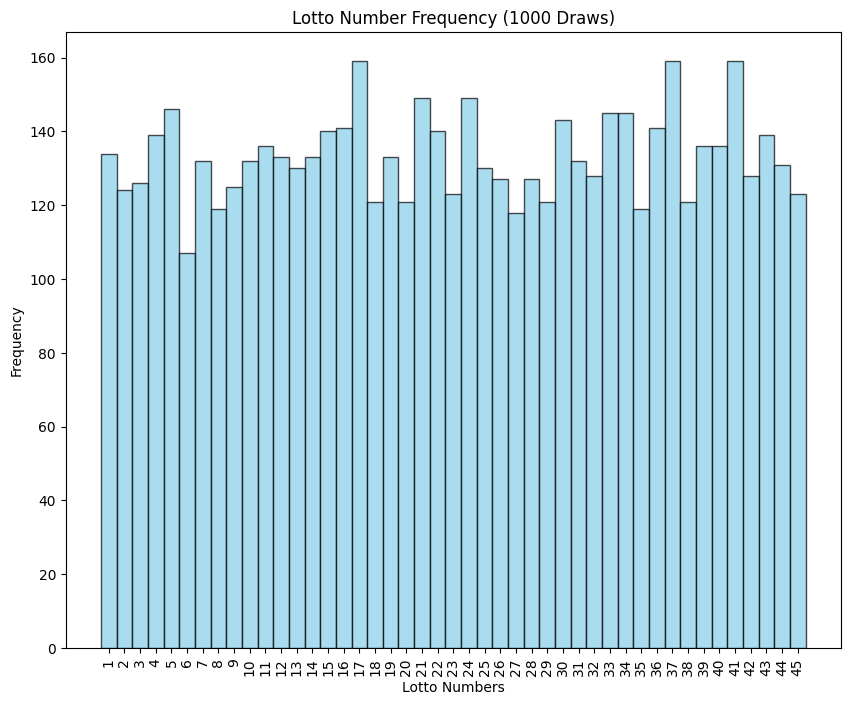

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 로또 번호 생성 함수
def generate_lotto_numbers():
    # 1부터 45까지의 숫자 풀
    lotto_pool = list(range(1, 46))

    # 6개의 번호 추첨
    lotto_numbers = np.random.choice(lotto_pool, size=6, replace=False)
    return lotto_numbers

# 빈도 분석용 데이터 생성
n_trials = 1000  # 로또 번호를 생성할 횟수
all_numbers = []

for _ in range(n_trials):
    lotto_numbers = generate_lotto_numbers()
    for number in lotto_numbers:
        all_numbers.append(number)  # 리스트에 모든 번호 추가

# 히스토그램 시각화
plt.figure(figsize = (10,8))
plt.hist(all_numbers, bins=range(1, 47), align='left', color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Lotto Number Frequency (1000 Draws)")
plt.xlabel("Lotto Numbers")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.xticks(range(1, 46))  # 1부터 45까지의 숫자
plt.show()